### An example showing the modelplotpy class  used by a scikit-learn classifier

In this example, we'll be plotting a `modelplotpy` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.modelplotpy` class.

# modelplotpy: a brief introduction

> https://archive.ics.uci.edu/dataset/222/bank+marketing

py
- https://modelplot.github.io/intro_modelplotpy.html
- https://medium.com/cmotions/visualise-the-business-value-of-predictive-models-21c6bc8132c

R
- https://modelplot.github.io/intro_modelplotr.html
- https://medium.com/cmotions/tutorial-evaluate-the-business-value-of-predictive-models-in-r-b21bd19adbc8

In [1]:
# !pip install catboost -Uq
import catboost
from catboost import CatBoostClassifier, Pool

catboost.__version__  # support numpy >= 2.0.0 for >=1.2.8

'1.2.8'

In [18]:
# !pip install xgboost -Uq
import xgboost
from xgboost import XGBClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np
np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

# %matplotlib inline
# plt.rcParams['figure.figsize'] = (9, 5)

# Import scikit-plots
import scikitplot as sp

sp.__version__

'0.5.dev0+git.20260120.02ace13'

In [3]:
from scikitplot.decile import modelplotpy

2026-01-21 21:35:18.801299: W scikitplot._docstrings._docstring 136417483945216 _docstring.py:407:__call__] Docstring substitution failed for <function plot_response at 0x7c11a534bec0>: must be real number, not dict
2026-01-21 21:35:18.803251: W scikitplot._docstrings._docstring 136417483945216 _docstring.py:407:__call__] Docstring substitution failed for <function plot_cumresponse at 0x7c11a534bf60>: must be real number, not dict
2026-01-21 21:35:18.805398: W scikitplot._docstrings._docstring 136417483945216 _docstring.py:407:__call__] Docstring substitution failed for <function plot_cumgains at 0x7c11a5370400>: must be real number, not dict
2026-01-21 21:35:18.808094: W scikitplot._docstrings._docstring 136417483945216 _docstring.py:407:__call__] Docstring substitution failed for <function plot_all at 0x7c11a5370540>: must be real number, not dict
2026-01-21 21:35:18.817640: W scikitplot._docstrings._docstring 136417483945216 _docstring.py:407:__call__] Docstring substitution failed 

In [4]:
# legacy modelplotpy
import scikitplot.decile.modelplotpy as mp

mp.__version__

'1.0.0'

In [5]:
mp.ModelPlotPy?

Init signature:
mp.ModelPlotPy(
    feature_data=[],
    label_data=[],
    dataset_labels=[],
    models=[],
    model_labels=[],
    ntiles=10,
    seed=0,
)
Docstring:     
ModelPlotPy decile analysis.

Parameters
----------
feature_data : list of objects (n_datasets, )
    Objects containing the X matrix for one or more different datasets.
label_data : list of objects (n_datasets, )
    Objects of the y vector for one or more different datasets.
dataset_labels : list of str (n_datasets, )
    Containing the names of the different `feature_data`
    and `label_data` combination pairs.
models : list of objects (n_models, )
    Containing the sk-learn model objects.
model_labels : list of str (n_models, )
    Names of the (sk-learn) models.
ntiles : int, default 10
    The number of splits range is (2, inf]:

    * 10 is called `deciles`
    * 100 is called `percentiles`
    * any other value is an `ntile`

seed : int, default=0
    Making the splits reproducible.

    .. versionchang

In [6]:
# new interface
import scikitplot.decile._decile_modelplotpy as mp2

In [7]:
mp2.ModelPlotPy?

Init signature:
mp2.ModelPlotPy(
    feature_data: 'Sequence[Any] | None' = None,
    label_data: 'Sequence[Any] | None' = None,
    dataset_labels: 'Sequence[str] | None' = None,
    models: 'Sequence[ClassifierMixin] | None' = None,
    model_labels: 'Sequence[str] | None' = None,
    ntiles: 'int' = 10,
    seed: 'int' = 0,
) -> 'None'
Docstring:     
Decile/ntile analysis for sklearn classifiers.

Parameters
----------
feature_data : Sequence[Any] or None, default=None
    Sequence of feature matrices (DataFrame or ndarray). One per dataset.
label_data : Sequence[Any] or None, default=None
    Sequence of label vectors (Series/ndarray/list). One per dataset.
dataset_labels : Sequence[str] or None, default=None
    Names for datasets; must match length of `feature_data` and `label_data`.
models : Sequence[ClassifierMixin] or None, default=None
    Fitted sklearn-like classifiers that implement `predict_proba` and `classes_`.
model_labels : Sequence[str] or None, default=None
    Nam

In [8]:
mp.__all__, mp2.__all__

(['ModelPlotPy',
  'plot_all',
  'plot_costsrevs',
  'plot_cumgains',
  'plot_cumlift',
  'plot_cumresponse',
  'plot_profit',
  'plot_response',
  'plot_roi',
  'test'],
 ['ModelPlotPy',
  'plot_response',
  'plot_cumresponse',
  'plot_cumlift',
  'plot_cumgains',
  'plot_all',
  'plot_costsrevs',
  'plot_profit',
  'plot_roi'])

In [9]:
import io
import os
import shutil
import warnings
import zipfile

import numpy as np
import pandas as pd
import requests

warnings.filterwarnings('ignore')

# r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip")
# we encountered that the source at uci.edu is not always available, therefore we made a copy to our repos.
r = requests.get('https://modelplot.github.io/img/bank-additional.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
# You can change the path, currently the data is written to the working directory
path = os.getcwd()
z.extractall(path)
try:
    # Remove the __MACOSX directory
    shutil.rmtree(os.path.join(path, '__MACOSX'))
except:
    pass
bank = pd.read_csv(path + '/bank-additional/bank-additional-full.csv', sep=';')

# select the 6 columns
bank = bank[['y', 'duration', 'campaign', 'pdays', 'previous', 'euribor3m']]
# rename target class value 'yes' for better interpretation
bank.y[bank.y == 'yes'] = 'term deposit'

# dimensions of the data
print(bank.shape)

# show the first rows of the dataset
bank

(41188, 6)


y  duration  campaign  pdays  previous  euribor3m
0                no       261         1    999         0      4.857
1                no       149         1    999         0      4.857
2                no       226         1    999         0      4.857
3                no       151         1    999         0      4.857
4                no       307         1    999         0      4.857
...             ...       ...       ...    ...       ...        ...
41183  term deposit       334         1    999         0      1.028
41184            no       383         1    999         0      1.028
41185            no       189         2    999         0      1.028
41186  term deposit       442         1    999         0      1.028
41187            no       239         3    999         1      1.028

[41188 rows x 6 columns]

In [ ]:
# to create predictive models

# define target vector y
y = bank.y  #.astype('category')
# define feature matrix X
X = bank.drop('y', axis=1)

# Encode target variable for xgb
label_encoder = LabelEncoder()
y = pd.Series(label_encoder.fit_transform(y))

In [34]:
from sklearn.metrics import log_loss

In [35]:
# Create the necessary datasets to build models
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=2018
)

# Instantiate a few classification models
%time clf_mult = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
%time clf_rf = RandomForestClassifier().fit(X_train, y_train)
params_boost = {
    "random_state": 0,  # seed, random_seed
	"n_estimators": 500,
	"learning_rate": 0.15,
	"max_depth": 6,
	# "objective": None,  # cat Alias: loss_function
}
params_xgb = {
    **params_boost,
    "seed": 0,
    "verbosity": None,  # Optional[int] [default=1] Verbosity of printing messages. Valid values of 0 (silent), 1 (warning), 2 (info), and 3 (debug).
	# "early_stopping_rounds": None,
    # https://xgboost.readthedocs.io/en/stable/tutorials/custom_metric_obj.html#customized-metric-function
	"eval_metric": log_loss,  # logloss
	"custom_metric": log_loss,
}
params_cat = {
    **params_boost,
    "random_seed": 0,
    "verbose": None,  # bool Alias: verbose_eval. Like: logging_level
	# "early_stopping_rounds": None,
    # https://catboost.ai/docs/en/concepts/python-usages-examples#logloss
    # Logloss, CrossEntropy, LogLikelihoodOfPrediction, PrecisionAt,
	"eval_metric": ['Logloss', 'AUC:hints=skip_train~false', 'CrossEntropy:hints=skip_train~false'],  
    # https://catboost.ai/docs/en/concepts/loss-functions#enable-disable-configure-metrics
    "custom_metric": ['Logloss', 'AUC:hints=skip_train~false', 'CrossEntropy:hints=skip_train~false'],
	# "class_names": ['A', 'B', 'C', 'D', 'E'],
}
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier.fit
%time clf_xgb = XGBClassifier(**params_boost).fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)
# https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier
# https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier_fit#call-format
%time clf_cat = CatBoostClassifier(**params_boost).fit(Pool(X_train, y_train), eval_set=Pool(X_test, y_test), verbose=100)  # plot=False, early_stopping_rounds=None, use_best_model=None,

CPU times: user 1.46 s, sys: 2.61 s, total: 4.07 s
Wall time: 1.15 s
CPU times: user 3.94 s, sys: 264 ms, total: 4.2 s
Wall time: 3.88 s
[0]	validation_0-logloss:0.29786
[100]	validation_0-logloss:0.18396
[200]	validation_0-logloss:0.18875
[300]	validation_0-logloss:0.19339
[400]	validation_0-logloss:0.19815
[499]	validation_0-logloss:0.20117
CPU times: user 7.82 s, sys: 133 ms, total: 7.95 s
Wall time: 2.12 s
0:	learn: 0.4927453	test: 0.4923715	best: 0.4923715 (0)	total: 17.1ms	remaining: 8.54s
100:	learn: 0.1676717	test: 0.1816126	best: 0.1815845 (99)	total: 977ms	remaining: 3.86s
200:	learn: 0.1558113	test: 0.1821743	best: 0.1810643 (134)	total: 1.75s	remaining: 2.61s
300:	learn: 0.1470072	test: 0.1834927	best: 0.1810643 (134)	total: 2.54s	remaining: 1.68s
400:	learn: 0.1397645	test: 0.1855101	best: 0.1810643 (134)	total: 3.48s	remaining: 859ms
499:	learn: 0.1339617	test: 0.1875986	best: 0.1810643 (134)	total: 4.32s	remaining: 0us

bestTest = 0.1810643099
bestIteration = 134

Shrink

In [48]:
obj = mp.ModelPlotPy(
	feature_data=[X_train, X_test],
	label_data=[y_train, y_test],
	dataset_labels=['train data', 'test data'],
	models=[clf_rf, clf_mult, clf_xgb, clf_cat],
	model_labels=['random forest', 'multinomial logit', 'XGBClassifier', 'CatBoostClassifier'],
	ntiles=10,
)
# transform data generated with prepare_scores_and_deciles into aggregated data for chosen plotting scope
ps = obj.plotting_scope(
	scope='compare_models',
	# select_model_label=['random forest', 'multinomial logit'],
	select_model_label=['random forest', 'multinomial logit', 'XGBClassifier', 'CatBoostClassifier'],
	select_dataset_label=['test data'],
    # select_targetclass=['term deposit'],
)
obj.get_params()

compare models
The label with smallest class is [1]


{'feature_data': [       duration  campaign  pdays  previous  euribor3m
  10013       514         4    999         0      4.959
  26717        92         2    999         0      4.076
  6902        297         1    999         0      4.860
  37534       275         1    999         0      0.873
  22795        90         2    999         0      4.965
  ...         ...       ...    ...       ...        ...
  35718        74         2    999         0      1.244
  10388        27         3    999         0      4.960
  40092       305         4      3         1      0.827
  19209       902         2    999         0      4.967
  14562       182         1    999         0      4.961
  
  [28831 rows x 5 columns],
         duration  campaign  pdays  previous  euribor3m
  19607       276         1    999         0      4.968
  18843       498         1    999         0      4.970
  3476        196         4    999         0      4.860
  21897       196         1    999         0      4.964
 

In [49]:
obj.ntiles

10

In [50]:
obj2 = mp2.ModelPlotPy(
	feature_data=[X_train, X_test],
	label_data=[y_train, y_test],
	dataset_labels=['train data', 'test data'],
	models=[clf_rf, clf_mult, clf_xgb, clf_cat],
	model_labels=['random forest', 'multinomial logit', 'XGBClassifier', 'CatBoostClassifier'],
	ntiles=10,
)
# transform data generated with prepare_scores_and_deciles into aggregated data for chosen plotting scope
ps2 = obj2.plotting_scope(
	# scope='compare_models',
	select_model_label=['random forest', 'multinomial logit', 'XGBClassifier', 'CatBoostClassifier'],
	select_dataset_label=['test data'],
    # select_targetclass=['term deposit'],
)
obj2.get_params()

{'feature_data': [       duration  campaign  pdays  previous  euribor3m
  10013       514         4    999         0      4.959
  26717        92         2    999         0      4.076
  6902        297         1    999         0      4.860
  37534       275         1    999         0      0.873
  22795        90         2    999         0      4.965
  ...         ...       ...    ...       ...        ...
  35718        74         2    999         0      1.244
  10388        27         3    999         0      4.960
  40092       305         4      3         1      0.827
  19209       902         2    999         0      4.967
  14562       182         1    999         0      4.961
  
  [28831 rows x 5 columns],
         duration  campaign  pdays  previous  euribor3m
  19607       276         1    999         0      4.968
  18843       498         1    999         0      4.970
  3476        196         4    999         0      4.860
  21897       196         1    999         0      4.964
 

In [51]:
obj2.ntiles

10

## Gains, Lift and (cumulative) Response plots

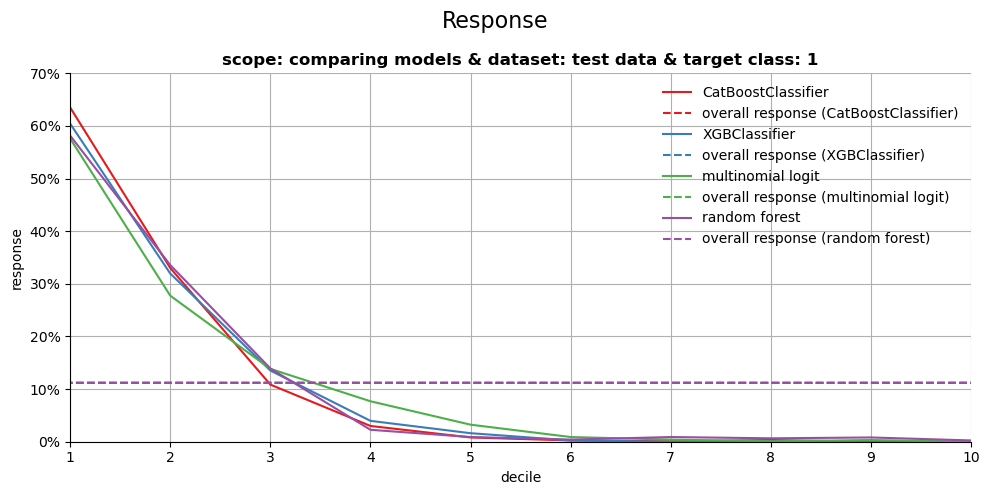

In [52]:
# plot the response plot and annotate the plot at decile = 2
ax = mp.plot_response(
    ps,
    save_fig=True,
)

When we select decile 3 from model CatBoostClassifier in dataset test data the percentage of 1 cases in the selection is 10% .
When we select decile 3 from model XGBClassifier in dataset test data the percentage of 1 cases in the selection is 13% .
When we select decile 3 from model multinomial logit in dataset test data the percentage of 1 cases in the selection is 13% .
When we select decile 3 from model random forest in dataset test data the percentage of 1 cases in the selection is 13% .


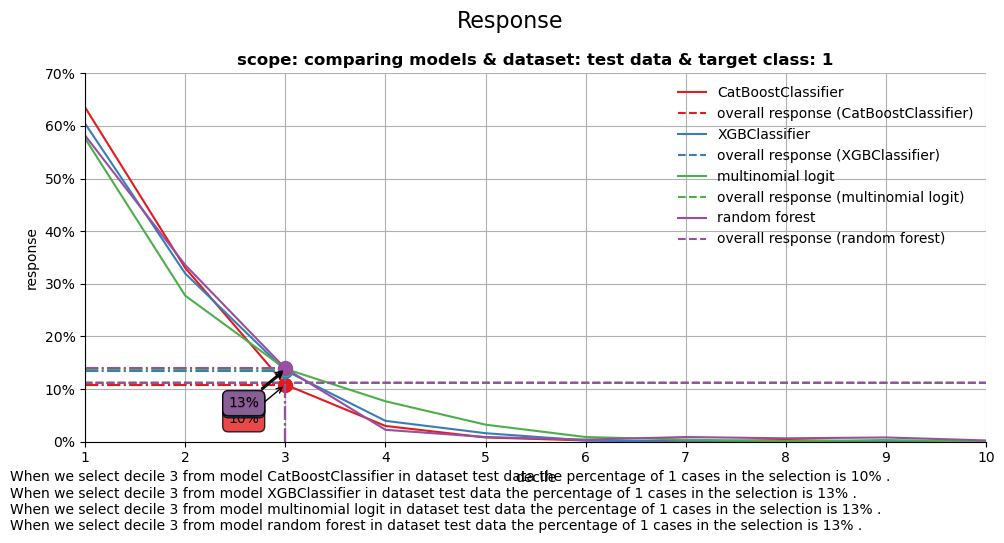

In [53]:
# plot the response plot and annotate the plot at decile = 2
ax = mp.plot_response(
    ps, highlight_ntile=3,
    save_fig=True,
)

Response @ decile 2 | model=CatBoostClassifier | dataset=test data | target=1 | value=33.01% — pos/tot=408 / 1,236
Response @ decile 2 | model=XGBClassifier | dataset=test data | target=1 | value=31.96% — pos/tot=395 / 1,236
Response @ decile 2 | model=multinomial logit | dataset=test data | target=1 | value=27.75% — pos/tot=343 / 1,236
Response @ decile 2 | model=random forest | dataset=test data | target=1 | value=33.66% — pos/tot=416 / 1,236
Response @ decile 3 | model=CatBoostClassifier | dataset=test data | target=1 | value=10.84% — pos/tot=134 / 1,236
Response @ decile 3 | model=XGBClassifier | dataset=test data | target=1 | value=13.51% — pos/tot=167 / 1,236
Response @ decile 3 | model=multinomial logit | dataset=test data | target=1 | value=13.83% — pos/tot=171 / 1,236
Response @ decile 3 | model=random forest | dataset=test data | target=1 | value=13.83% — pos/tot=171 / 1,236
Response @ decile 4 | model=CatBoostClassifier | dataset=test data | target=1 | value=3.00% — pos/tot=

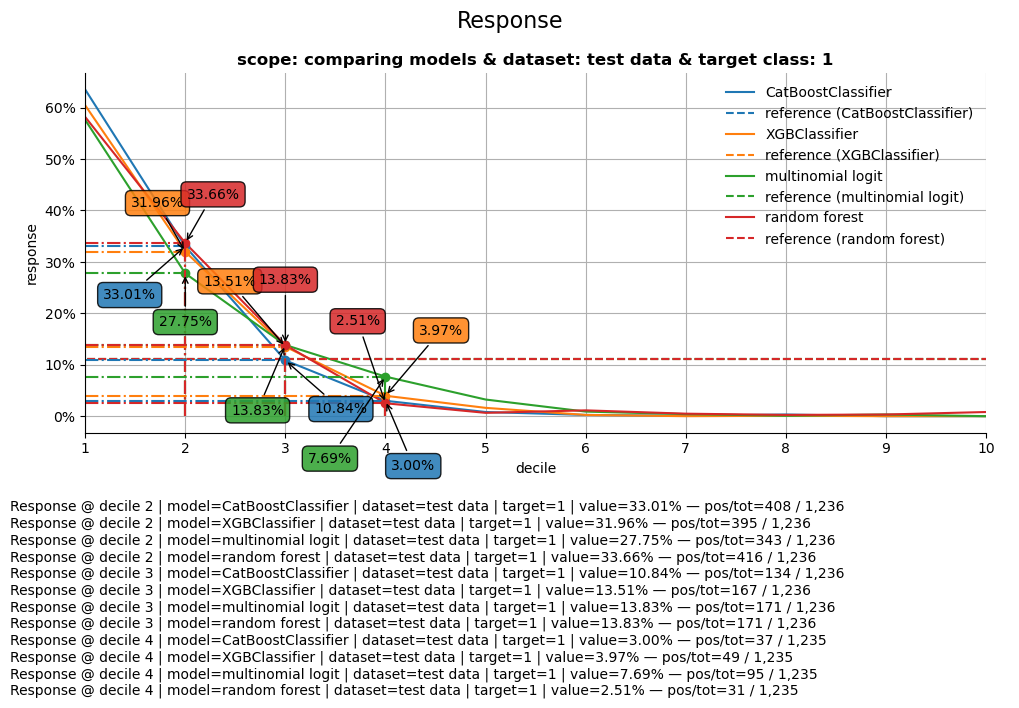

In [54]:
# plot the response plot and annotate the plot at decile = 2
ax = mp2.plot_response(
    ps2, highlight_ntile=[2, 3, 4],
    save_fig=True,
)

When we select decile 3 from model CatBoostClassifier in dataset test data the percentage of 1 cases in the selection is 35% .
When we select decile 3 from model XGBClassifier in dataset test data the percentage of 1 cases in the selection is 35% .
When we select decile 3 from model multinomial logit in dataset test data the percentage of 1 cases in the selection is 33% .
When we select decile 3 from model random forest in dataset test data the percentage of 1 cases in the selection is 35% .


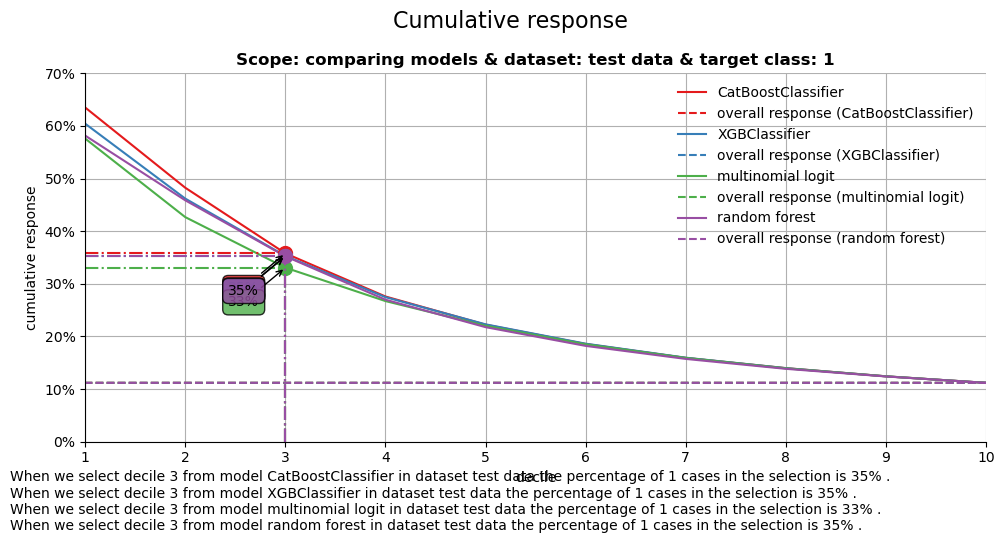

<Axes: title={'center': 'Scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='cumulative response'>

In [55]:
# plot the cumulative response plot and annotate the plot at decile = 3
mp.plot_cumresponse(
    ps, highlight_ntile=3,
    save_fig=True,
)

CumResponse 1..decile 2 | model=CatBoostClassifier | dataset=test data | target=1 | value=48.26% — pos/tot=1,193 / 2,472
CumResponse 1..decile 2 | model=XGBClassifier | dataset=test data | target=1 | value=46.20% — pos/tot=1,142 / 2,472
CumResponse 1..decile 2 | model=multinomial logit | dataset=test data | target=1 | value=42.68% — pos/tot=1,055 / 2,472
CumResponse 1..decile 2 | model=random forest | dataset=test data | target=1 | value=45.91% — pos/tot=1,135 / 2,472
CumResponse 1..decile 3 | model=CatBoostClassifier | dataset=test data | target=1 | value=35.79% — pos/tot=1,327 / 3,708
CumResponse 1..decile 3 | model=XGBClassifier | dataset=test data | target=1 | value=35.30% — pos/tot=1,309 / 3,708
CumResponse 1..decile 3 | model=multinomial logit | dataset=test data | target=1 | value=33.06% — pos/tot=1,226 / 3,708
CumResponse 1..decile 3 | model=random forest | dataset=test data | target=1 | value=35.22% — pos/tot=1,306 / 3,708
CumResponse 1..decile 4 | model=CatBoostClassifier | d

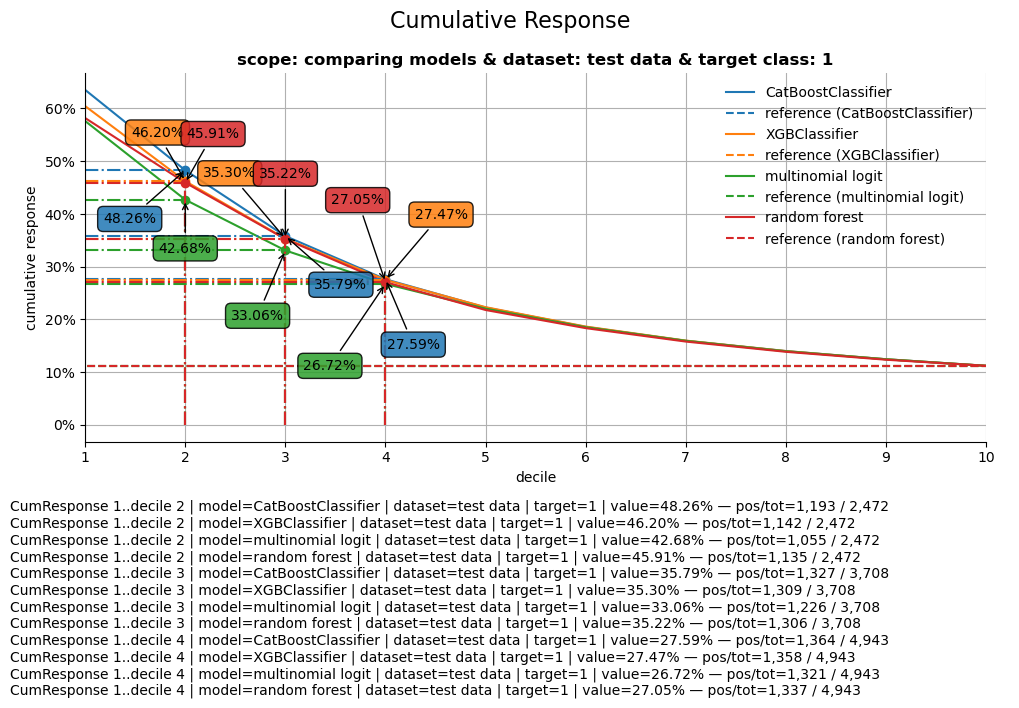

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='cumulative response'>

In [56]:
# plot the cumulative response plot and annotate the plot at decile = 3
mp2.plot_cumresponse(
    ps2, highlight_ntile=[2, 3, 4],
    save_fig=True,
)

When we select 30 with the highest probability according to model CatBoostClassifier, this selection holds 96% of
all 1 cases in dataset test data.
When we select 30 with the highest probability according to model XGBClassifier, this selection holds 94% of
all 1 cases in dataset test data.
When we select 30 with the highest probability according to model multinomial logit, this selection holds 88% of
all 1 cases in dataset test data.
When we select 30 with the highest probability according to model random forest, this selection holds 94% of
all 1 cases in dataset test data.


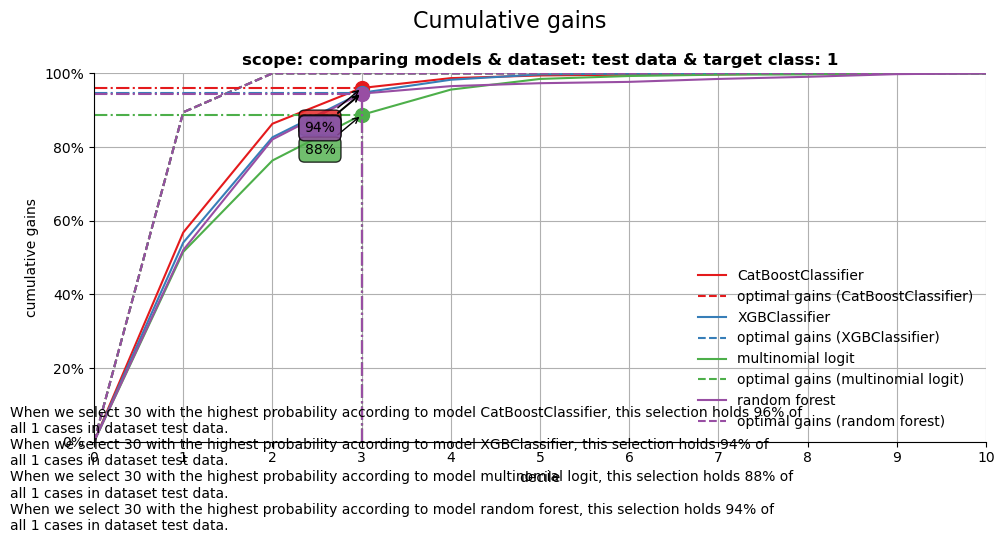

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='cumulative gains'>

In [57]:
# plot the cumulative gains plot and annotate the plot at decile = 2
mp.plot_cumgains(
    ps, highlight_ntile=3,
    save_fig=True,
)

CumGains 1..decile 2 | model=CatBoostClassifier | dataset=test data | target=1 | value=86.32% — pos/tot=1,193 / 1,382
CumGains 1..decile 2 | model=XGBClassifier | dataset=test data | target=1 | value=82.63% — pos/tot=1,142 / 1,382
CumGains 1..decile 2 | model=multinomial logit | dataset=test data | target=1 | value=76.34% — pos/tot=1,055 / 1,382
CumGains 1..decile 2 | model=random forest | dataset=test data | target=1 | value=82.13% — pos/tot=1,135 / 1,382
CumGains 1..decile 3 | model=CatBoostClassifier | dataset=test data | target=1 | value=96.02% — pos/tot=1,327 / 1,382
CumGains 1..decile 3 | model=XGBClassifier | dataset=test data | target=1 | value=94.72% — pos/tot=1,309 / 1,382
CumGains 1..decile 3 | model=multinomial logit | dataset=test data | target=1 | value=88.71% — pos/tot=1,226 / 1,382
CumGains 1..decile 3 | model=random forest | dataset=test data | target=1 | value=94.50% — pos/tot=1,306 / 1,382
CumGains 1..decile 4 | model=CatBoostClassifier | dataset=test data | target=1

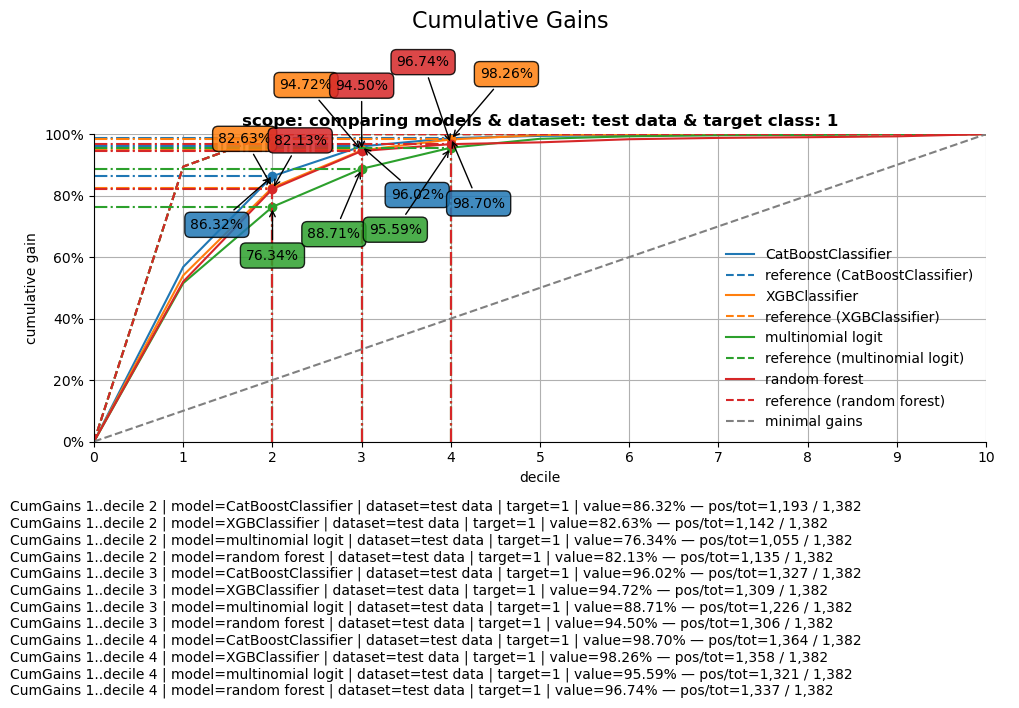

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='cumulative gain'>

In [58]:
# plot the cumulative gains plot and annotate the plot at decile = 2
mp2.plot_cumgains(
    ps2, highlight_ntile=[2, 3, 4],
    save_fig=True,
)

When we select 30 with the highest probability according to model CatBoostClassifier in dataset test data,
this selection for target class 1 is 3.2 times than selecting without a model.
When we select 30 with the highest probability according to model XGBClassifier in dataset test data,
this selection for target class 1 is 3.16 times than selecting without a model.
When we select 30 with the highest probability according to model multinomial logit in dataset test data,
this selection for target class 1 is 2.96 times than selecting without a model.
When we select 30 with the highest probability according to model random forest in dataset test data,
this selection for target class 1 is 3.15 times than selecting without a model.


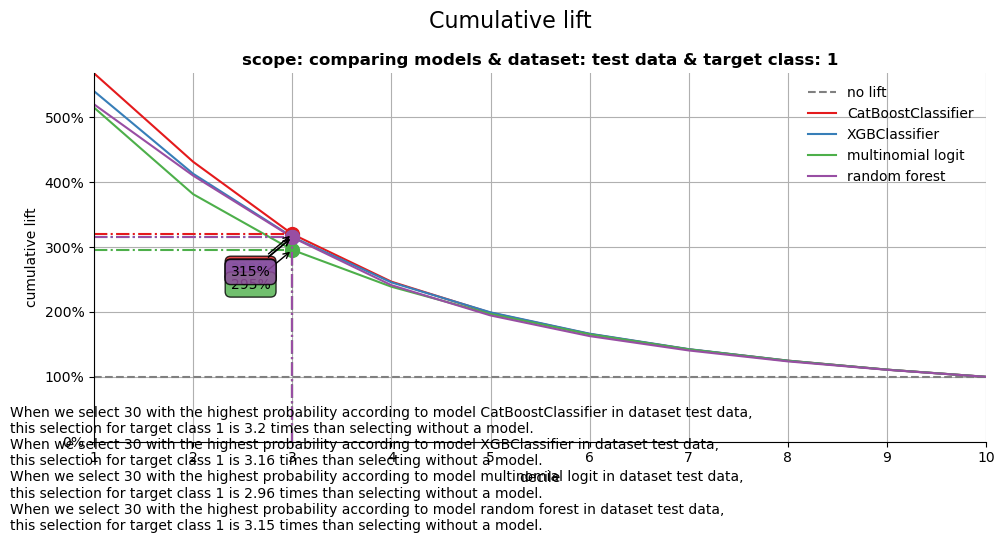

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='cumulative lift'>

In [59]:
# plot the cumulative lift plot and annotate the plot at decile = 2
mp.plot_cumlift(
    ps, highlight_ntile=3,
    save_fig=True
)

CumLift 1..decile 2 | model=CatBoostClassifier | dataset=test data | target=1 | value=4.32x — pos/tot=1,193 / 2,472
CumLift 1..decile 2 | model=XGBClassifier | dataset=test data | target=1 | value=4.13x — pos/tot=1,142 / 2,472
CumLift 1..decile 2 | model=multinomial logit | dataset=test data | target=1 | value=3.82x — pos/tot=1,055 / 2,472
CumLift 1..decile 2 | model=random forest | dataset=test data | target=1 | value=4.11x — pos/tot=1,135 / 2,472
CumLift 1..decile 3 | model=CatBoostClassifier | dataset=test data | target=1 | value=3.20x — pos/tot=1,327 / 3,708
CumLift 1..decile 3 | model=XGBClassifier | dataset=test data | target=1 | value=3.16x — pos/tot=1,309 / 3,708
CumLift 1..decile 3 | model=multinomial logit | dataset=test data | target=1 | value=2.96x — pos/tot=1,226 / 3,708
CumLift 1..decile 3 | model=random forest | dataset=test data | target=1 | value=3.15x — pos/tot=1,306 / 3,708
CumLift 1..decile 4 | model=CatBoostClassifier | dataset=test data | target=1 | value=2.47x — 

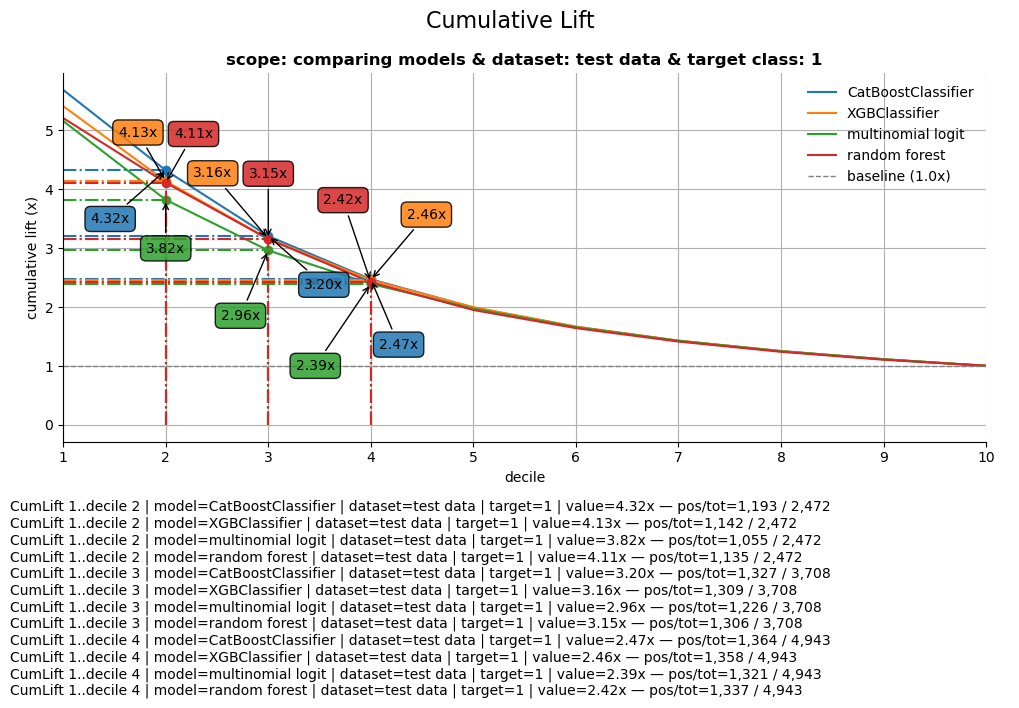

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='cumulative lift (x)'>

In [60]:
# plot the cumulative lift plot and annotate the plot at decile = 2
mp2.plot_cumlift(
    ps2, highlight_ntile=[2, 3, 4],
    save_fig=True
)

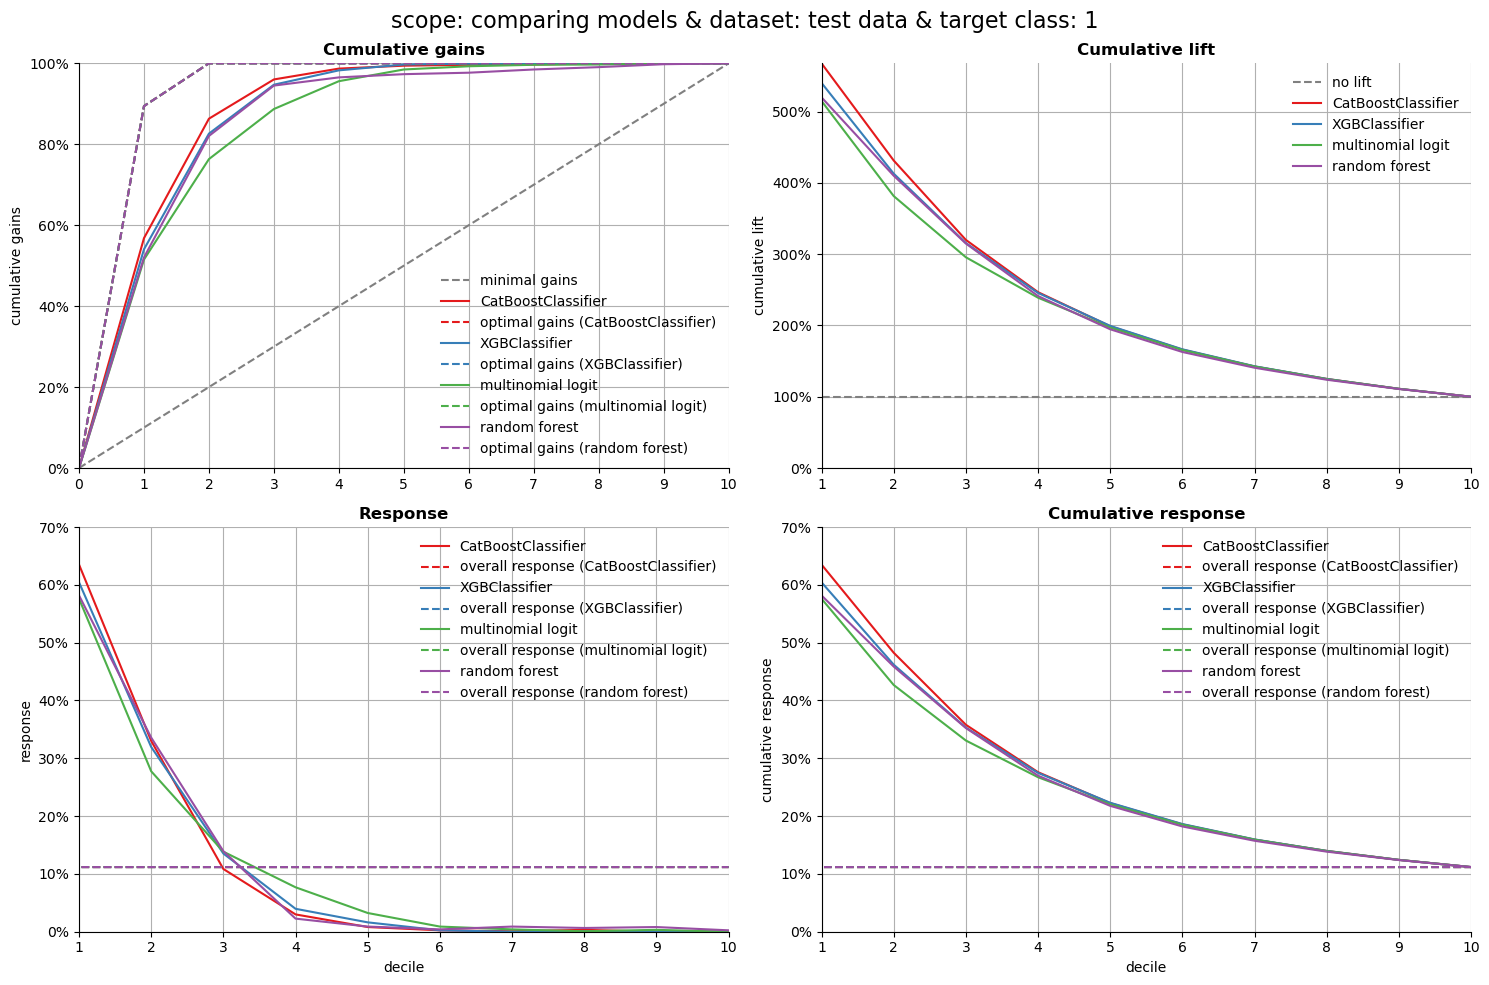

<Axes: title={'center': 'Cumulative gains'}, ylabel='cumulative gains'>

In [61]:
# plot all four evaluation plots and save to file
mp.plot_all(
	ps,
	save_fig = True,
	# save_fig_filename = 'Selection model Term Deposits'
)

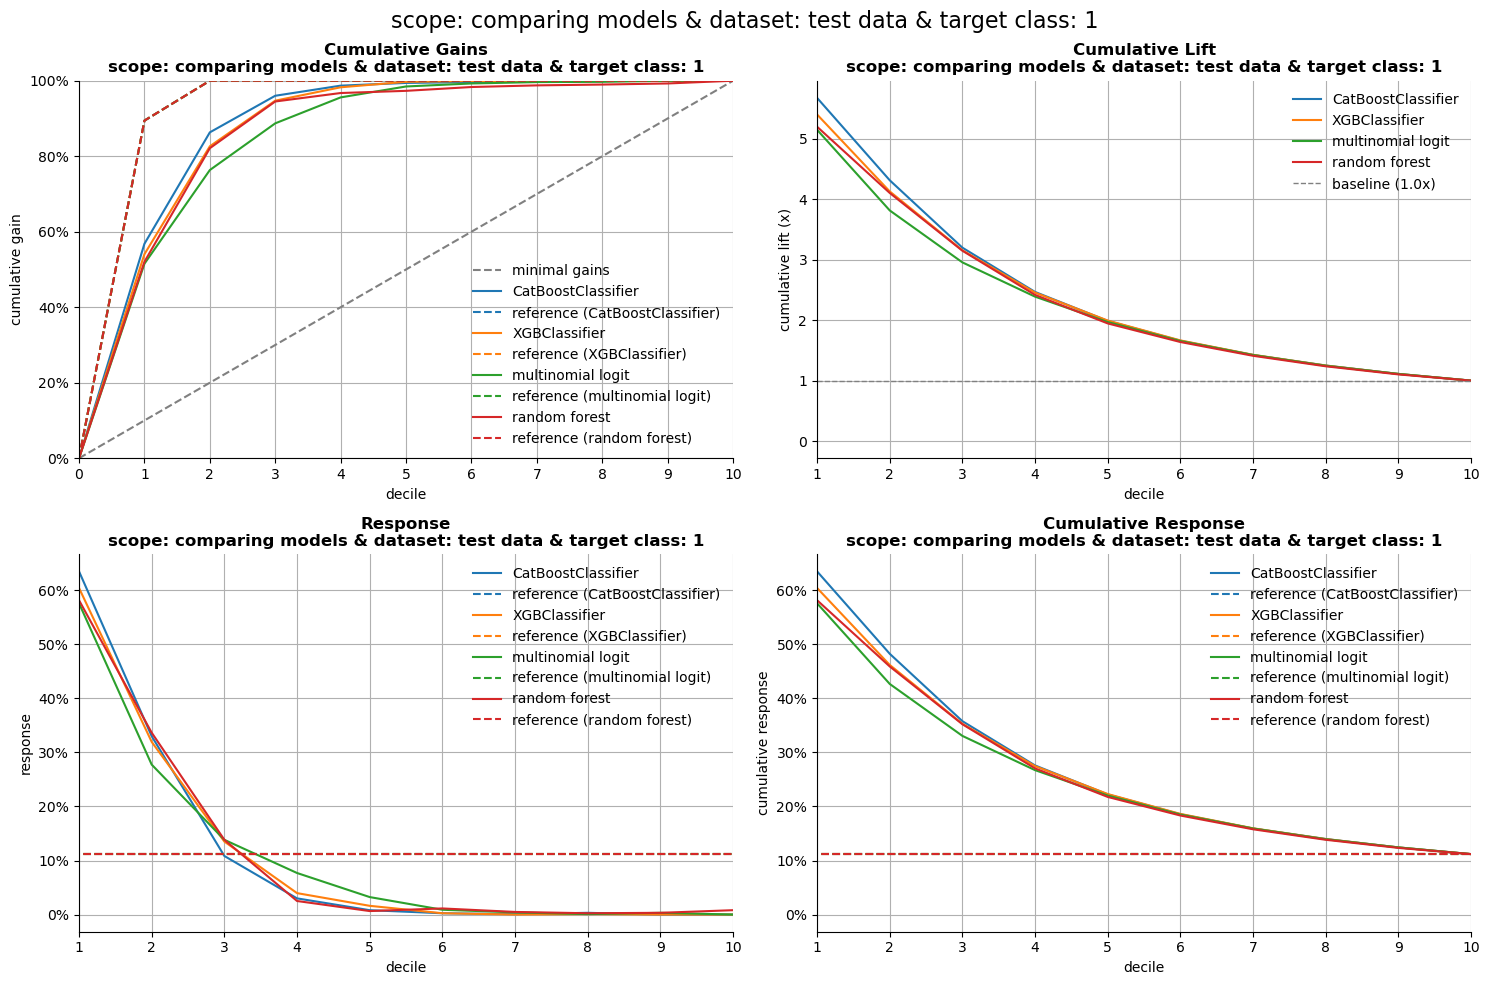

<Axes: title={'center': 'Cumulative Gains\nscope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='cumulative gain'>

In [62]:
# plot all four evaluation plots and save to file
mp2.plot_all(
	ps2,
	save_fig = True,
	# save_fig_filename = 'Selection model Term Deposits'
)

## Financial Implications

When we select decile 1 until 3 from model CatBoostClassifier in dataset test data the percentage of 1 cases in the expected roi is 27.
When we select decile 1 until 3 from model XGBClassifier in dataset test data the percentage of 1 cases in the expected roi is 25.
When we select decile 1 until 3 from model multinomial logit in dataset test data the percentage of 1 cases in the expected roi is 17.
When we select decile 1 until 3 from model random forest in dataset test data the percentage of 1 cases in the expected roi is 25.


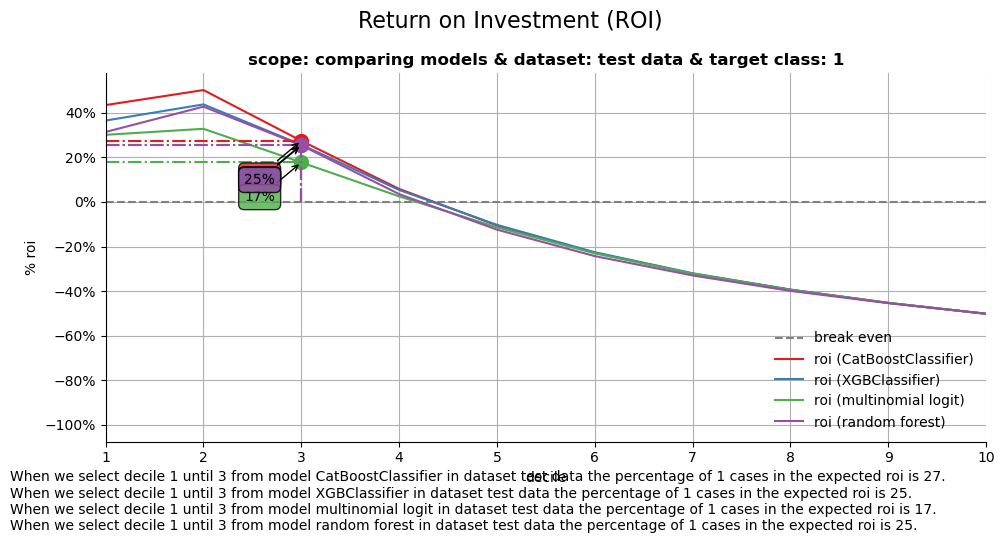

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='% roi'>

In [63]:
mp.plot_roi(
	ps,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True,
    highlight_ntile=3,
)

ROI 1..decile 2 | model=CatBoostClassifier | dataset=test data | target=1 | value=50.18% — pos/tot=1,193 / 2,472
ROI 1..decile 2 | model=XGBClassifier | dataset=test data | target=1 | value=43.76% — pos/tot=1,142 / 2,472
ROI 1..decile 2 | model=multinomial logit | dataset=test data | target=1 | value=32.80% — pos/tot=1,055 / 2,472
ROI 1..decile 2 | model=random forest | dataset=test data | target=1 | value=42.88% — pos/tot=1,135 / 2,472
ROI 1..decile 3 | model=CatBoostClassifier | dataset=test data | target=1 | value=27.40% — pos/tot=1,327 / 3,708
ROI 1..decile 3 | model=XGBClassifier | dataset=test data | target=1 | value=25.67% — pos/tot=1,309 / 3,708
ROI 1..decile 3 | model=multinomial logit | dataset=test data | target=1 | value=17.70% — pos/tot=1,226 / 3,708
ROI 1..decile 3 | model=random forest | dataset=test data | target=1 | value=25.38% — pos/tot=1,306 / 3,708
ROI 1..decile 4 | model=CatBoostClassifier | dataset=test data | target=1 | value=5.85% — pos/tot=1,364 / 4,943
ROI 1.

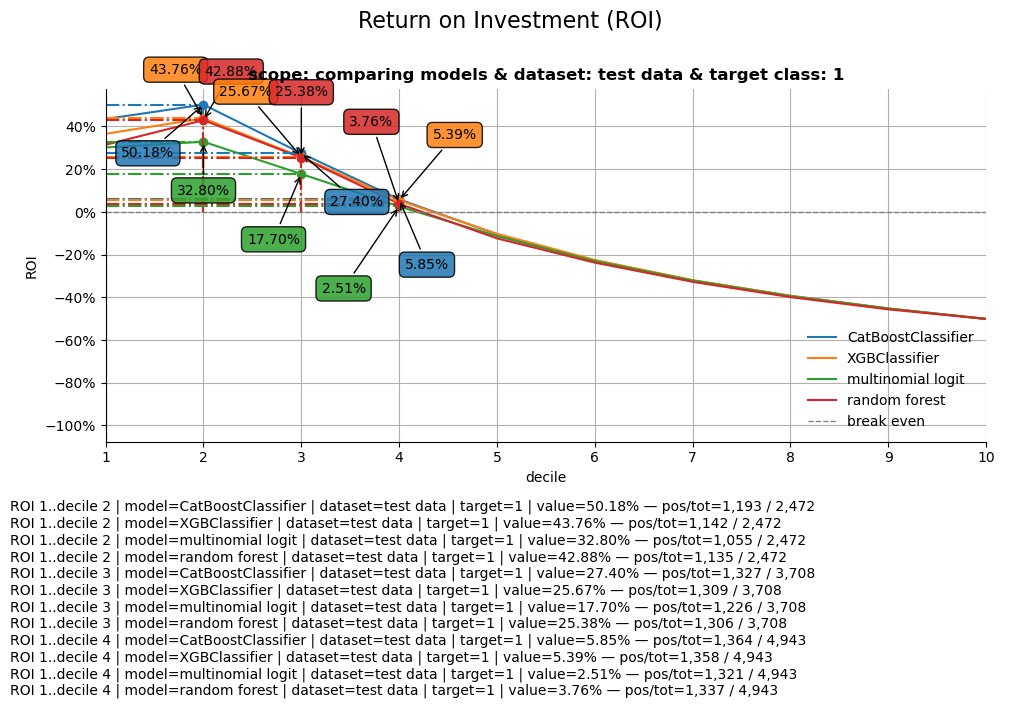

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='ROI'>

In [64]:
mp2.plot_roi(
	ps2,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True,
    highlight_ntile=[2, 3, 4],
)

When we select decile 1 until 3 from model CatBoostClassifier in dataset test data the percentage of 1 cases in the revenue is 66350.
When we select decile 1 until 3 from model XGBClassifier in dataset test data the percentage of 1 cases in the revenue is 65450.
When we select decile 1 until 3 from model multinomial logit in dataset test data the percentage of 1 cases in the revenue is 61300.
When we select decile 1 until 3 from model random forest in dataset test data the percentage of 1 cases in the revenue is 65300.


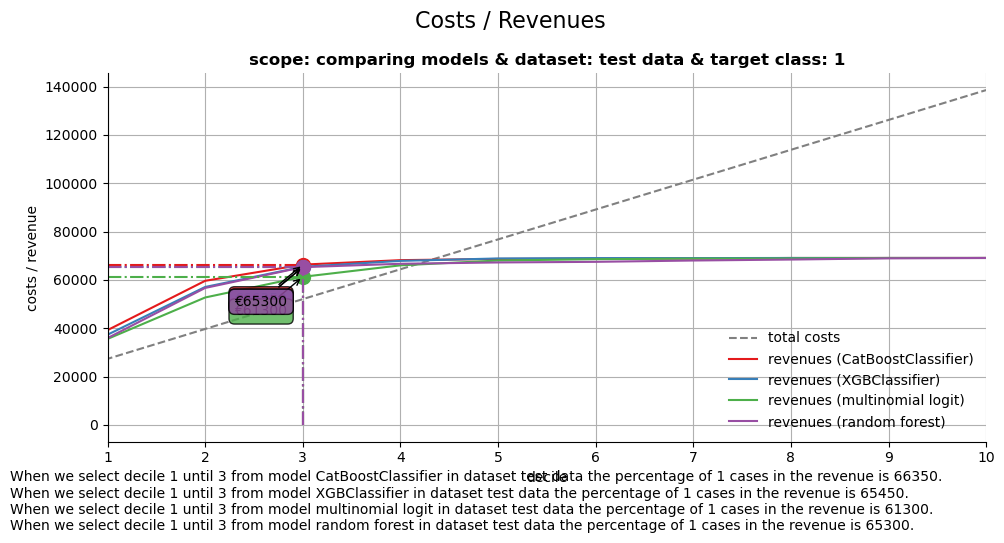

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='costs / revenue'>

In [65]:
mp.plot_costsrevs(
	ps,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True,
    highlight_ntile=3,
)

Revenues 1..decile 2 | model=CatBoostClassifier | dataset=test data | target=1 | value=€59,650 — pos/tot=1,193 / 2,472
Revenues 1..decile 3 | model=CatBoostClassifier | dataset=test data | target=1 | value=€66,350 — pos/tot=1,327 / 3,708
Revenues 1..decile 4 | model=CatBoostClassifier | dataset=test data | target=1 | value=€68,200 — pos/tot=1,364 / 4,943
Revenues 1..decile 2 | model=XGBClassifier | dataset=test data | target=1 | value=€57,100 — pos/tot=1,142 / 2,472
Revenues 1..decile 3 | model=XGBClassifier | dataset=test data | target=1 | value=€65,450 — pos/tot=1,309 / 3,708
Revenues 1..decile 4 | model=XGBClassifier | dataset=test data | target=1 | value=€67,900 — pos/tot=1,358 / 4,943
Revenues 1..decile 2 | model=multinomial logit | dataset=test data | target=1 | value=€52,750 — pos/tot=1,055 / 2,472
Revenues 1..decile 3 | model=multinomial logit | dataset=test data | target=1 | value=€61,300 — pos/tot=1,226 / 3,708
Revenues 1..decile 4 | model=multinomial logit | dataset=test dat

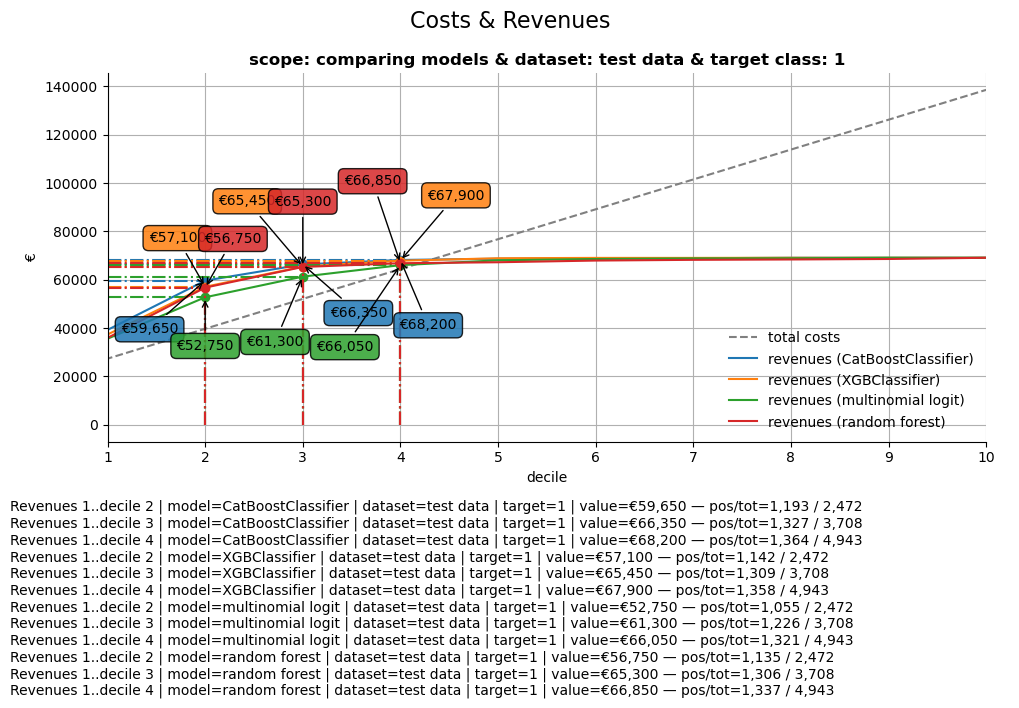

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='€'>

In [66]:
mp2.plot_costsrevs(
	ps2,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True,
    highlight_ntile=[2, 3, 4],
)

When we select decile 1 until 2 from model CatBoostClassifier in dataset test data the percentage of 1 cases in the expected profit is 19930.
When we select decile 1 until 2 from model XGBClassifier in dataset test data the percentage of 1 cases in the expected profit is 17380.
When we select decile 1 until 2 from model multinomial logit in dataset test data the percentage of 1 cases in the expected profit is 13030.
When we select decile 1 until 2 from model random forest in dataset test data the percentage of 1 cases in the expected profit is 16980.


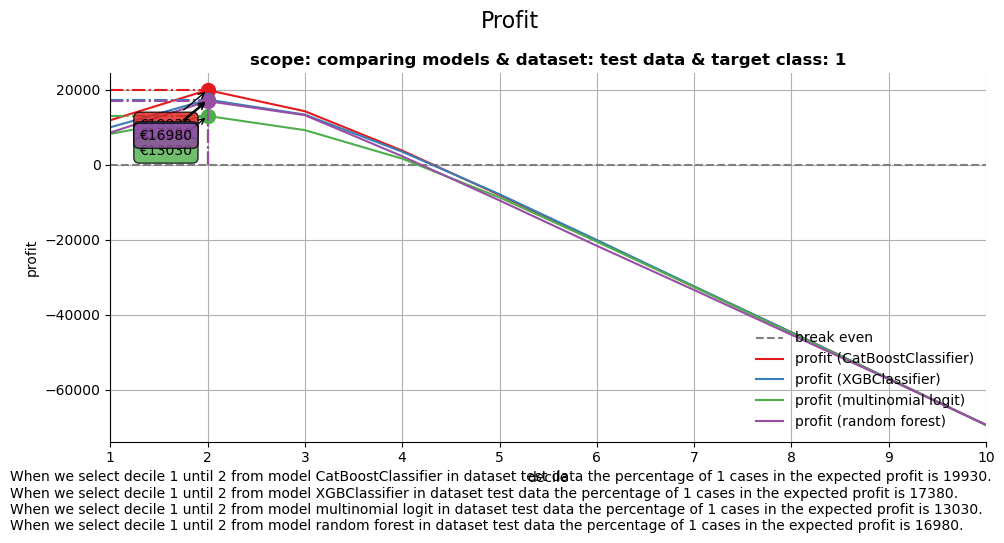

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='profit'>

In [67]:
mp.plot_profit(
	ps,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	highlight_ntile=2,
	save_fig=True,
)

Profit 1..decile 2 | model=CatBoostClassifier | dataset=test data | target=1 | value=€19,930 — pos/tot=1,193 / 2,472
Profit 1..decile 2 | model=XGBClassifier | dataset=test data | target=1 | value=€17,380 — pos/tot=1,142 / 2,472
Profit 1..decile 2 | model=multinomial logit | dataset=test data | target=1 | value=€13,030 — pos/tot=1,055 / 2,472
Profit 1..decile 2 | model=random forest | dataset=test data | target=1 | value=€17,030 — pos/tot=1,135 / 2,472
Profit 1..decile 3 | model=CatBoostClassifier | dataset=test data | target=1 | value=€14,270 — pos/tot=1,327 / 3,708
Profit 1..decile 3 | model=XGBClassifier | dataset=test data | target=1 | value=€13,370 — pos/tot=1,309 / 3,708
Profit 1..decile 3 | model=multinomial logit | dataset=test data | target=1 | value=€9,220 — pos/tot=1,226 / 3,708
Profit 1..decile 3 | model=random forest | dataset=test data | target=1 | value=€13,220 — pos/tot=1,306 / 3,708
Profit 1..decile 4 | model=CatBoostClassifier | dataset=test data | target=1 | value=€3

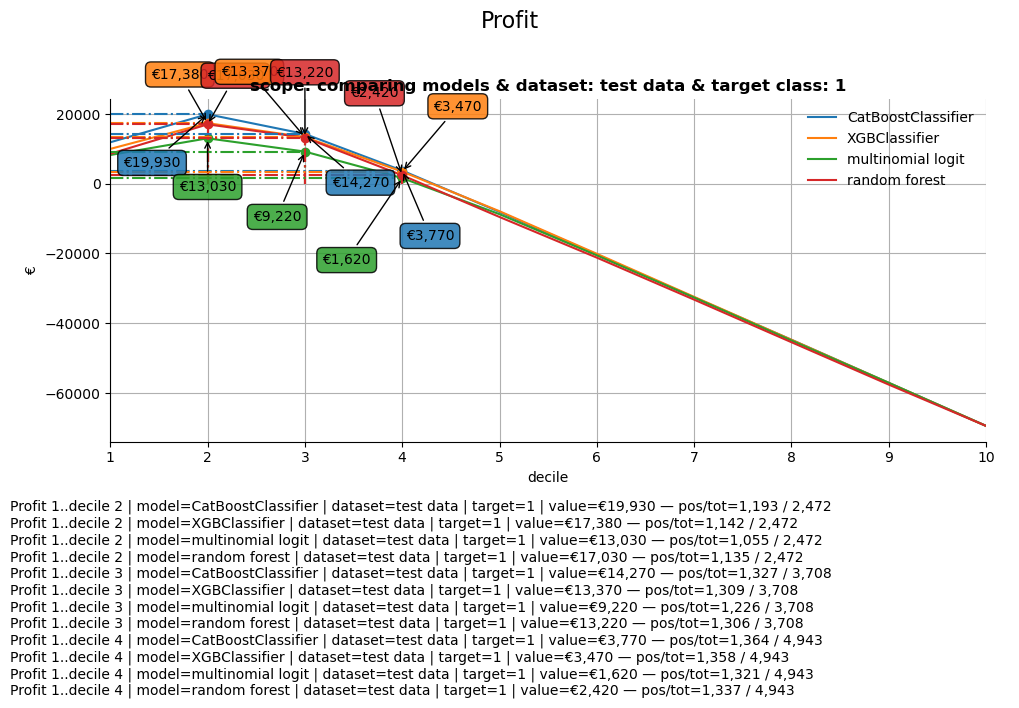

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: 1'}, xlabel='decile', ylabel='€'>

In [68]:
mp2.plot_profit(
	ps2,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
    highlight_ntile=[2, 3, 4],
	save_fig=True,
)

# Get more out of modelplotpy: using different scopes

In [69]:
# set plotting scope to model comparison
ps3 = obj.plotting_scope(
    scope='no_comparison',
	# select_model_label=['random forest', 'multinomial logit'],
    select_dataset_label=['test data']
)

Default scope value no_comparison selected, single evaluation line will be plotted.
The label with smallest class is 1
Target class 1, dataset test data and model random forest.


In [70]:
ps3

model_label dataset_label  target_class  ntile   tot  pos   neg  \
0   random forest     test data             1      0     0    0     0   
30  random forest     test data             1      1  1236  719   517   
31  random forest     test data             1      2  1236  415   821   
32  random forest     test data             1      3  1235  172  1063   
33  random forest     test data             1      4  1236   28  1208   
34  random forest     test data             1      5  1235   11  1224   
35  random forest     test data             1      6  1236    5  1231   
36  random forest     test data             1      7  1236   11  1225   
37  random forest     test data             1      8  1235    8  1227   
38  random forest     test data             1      9  1236   10  1226   
39  random forest     test data             1     10  1236    3  1233   

         pct  postot  negtot  ...    cumpct      gain   cumgain  gain_ref  \
0   0.000000       0       0  ...  0.000000  0.000000  0.000000       0.0   
30  0.581715    1382   10975  ...  0.581715  0.520260  0.520260       0.1   
31  0.335761    1382   10975  ...  0.458738  0.300289  0.820550       0.2   
32  0.139271    1382   10975  ...  0.352306  0.124457  0.945007       0.3   
33  0.022654    1382   10975  ...  0.269877  0.020260  0.965268       0.4   
34  0.008907    1382   10975  ...  0.217708  0.007959  0.973227       0.5   
35  0.004045    1382   10975  ...  0.182088  0.003618  0.976845       0.6   
36  0.008900    1382   10975  ...  0.157341  0.007959  0.984805       0.7   
37  0.006478    1382   10975  ...  0.138493  0.005789  0.990593       0.8   
38  0.008091    1382   10975  ...  0.124000  0.007236  0.997829       0.9   
39  0.002427    1382   10975  ...  0.111839  0.002171  1.000000       1.0   

     pct_ref  gain_opt      lift   cumlift  cumlift_ref          scope  
0   0.000000  0.000000  0.000000  0.000000            1  no_comparison  
30  0.111839  0.894356  5.201342  5.201342            1  no_comparison  
31  0.111839  1.000000  3.002165  4.101754            1  no_comparison  
32  0.111839  1.000000  1.245279  3.150109            1  no_comparison  
33  0.111839  1.000000  0.202556  2.413072            1  no_comparison  
34  0.111839  1.000000  0.079640  1.946612            1  no_comparison  
35  0.111839  1.000000  0.036171  1.628119            1  no_comparison  
36  0.111839  1.000000  0.079575  1.406847            1  no_comparison  
37  0.111839  1.000000  0.057920  1.238317            1  no_comparison  
38  0.111839  1.000000  0.072341  1.108729            1  no_comparison  
39  0.111839  1.000000  0.021702  1.000000            1  no_comparison  

[11 rows x 25 columns]

When we select decile 3 from model random forest in dataset test data the percentage of 1 cases in the selection is 35% .


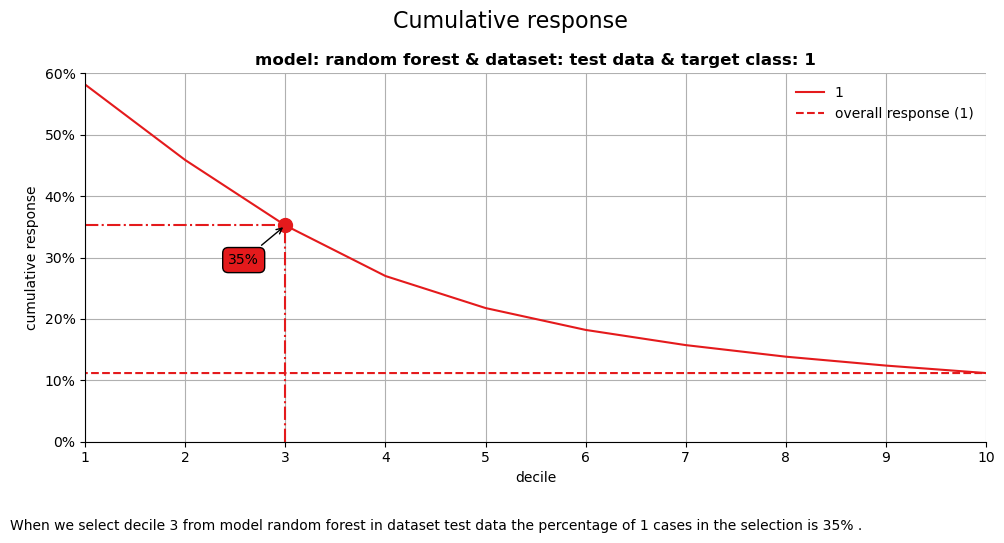

<Axes: title={'center': 'model: random forest & dataset: test data & target class: 1'}, xlabel='decile', ylabel='cumulative response'>

In [71]:
# plot the cumulative response plot and annotate the plot at decile = 3
mp.plot_cumresponse(
    ps3, highlight_ntile=3,
    save_fig=True
)

In [72]:
# set plotting scope to model comparison
ps4 = obj2.plotting_scope(
    # scope='no_comparison',
	select_model_label=['random forest'],
    select_dataset_label=['test data'],
    # select_targetclass=['term deposit'],
)

In [73]:
ps4

model_label dataset_label  target_class  ntile   tot  pos   neg  \
143  random forest     test data             1      0     0    0     0   
144  random forest     test data             1      1  1236  719   517   
145  random forest     test data             1      2  1236  416   820   
146  random forest     test data             1      3  1236  171  1065   
147  random forest     test data             1      4  1235   31  1204   
148  random forest     test data             1      5  1236    8  1228   
149  random forest     test data             1      6  1236   14  1222   
150  random forest     test data             1      7  1235    6  1229   
151  random forest     test data             1      8  1236    3  1233   
152  random forest     test data             1      9  1236    4  1232   
153  random forest     test data             1     10  1235   10  1225   

          pct  postot  negtot  ...    cumpct      gain   cumgain  gain_ref  \
143  0.000000    1382   10975  ...  0.000000  0.000000  0.000000       0.0   
144  0.581715    1382   10975  ...  0.581715  0.520260  0.520260       0.1   
145  0.336570    1382   10975  ...  0.459142  0.301013  0.821274       0.2   
146  0.138350    1382   10975  ...  0.352211  0.123734  0.945007       0.3   
147  0.025101    1382   10975  ...  0.270484  0.022431  0.967438       0.4   
148  0.006472    1382   10975  ...  0.217673  0.005789  0.973227       0.5   
149  0.011327    1382   10975  ...  0.183277  0.010130  0.983357       0.6   
150  0.004858    1382   10975  ...  0.157803  0.004342  0.987699       0.7   
151  0.002427    1382   10975  ...  0.138378  0.002171  0.989870       0.8   
152  0.003236    1382   10975  ...  0.123359  0.002894  0.992764       0.9   
153  0.008097    1382   10975  ...  0.111839  0.007236  1.000000       1.0   

      pct_ref  gain_opt      lift   cumlift  cumlift_ref          scope  
143  0.111839  0.000000  0.000000  0.000000          1.0  no_comparison  
144  0.111839  0.894356  5.201342  5.201342          1.0  no_comparison  
145  0.111839  1.000000  3.009400  4.105371          1.0  no_comparison  
146  0.111839  1.000000  1.237037  3.149260          1.0  no_comparison  
147  0.111839  1.000000  0.224440  2.418498          1.0  no_comparison  
148  0.111839  1.000000  0.057873  1.946297          1.0  no_comparison  
149  0.111839  1.000000  0.101278  1.638752          1.0  no_comparison  
150  0.111839  1.000000  0.043440  1.410982          1.0  no_comparison  
151  0.111839  1.000000  0.021702  1.237287          1.0  no_comparison  
152  0.111839  1.000000  0.028937  1.103002          1.0  no_comparison  
153  0.111839  1.000000  0.072400  1.000000          1.0  no_comparison  

[11 rows x 25 columns]

CumResponse 1..decile 3 | model=random forest | dataset=test data | target=1 | value=35.22% — pos/tot=1,306 / 3,708
CumResponse 1..decile 4 | model=random forest | dataset=test data | target=1 | value=27.05% — pos/tot=1,337 / 4,943


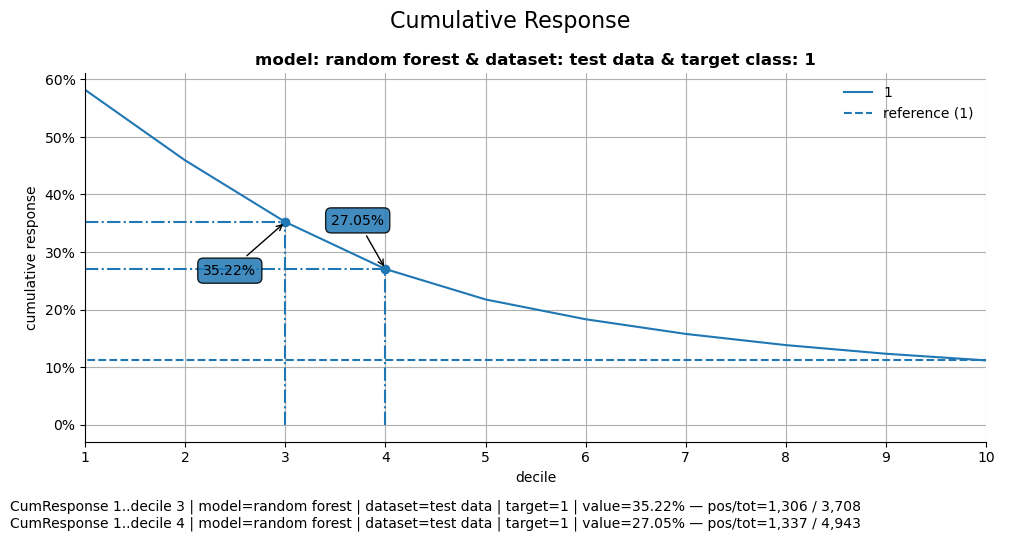

<Axes: title={'center': 'model: random forest & dataset: test data & target class: 1'}, xlabel='decile', ylabel='cumulative response'>

In [74]:
# plot the cumulative response plot and annotate the plot at decile = 3
mp2.plot_cumresponse(
    ps4, highlight_ntile=[3, 4],
    save_fig=True
)

When we select decile 1 until 3 from model random forest in dataset test data the percentage of 1 cases in the revenue is 65300.


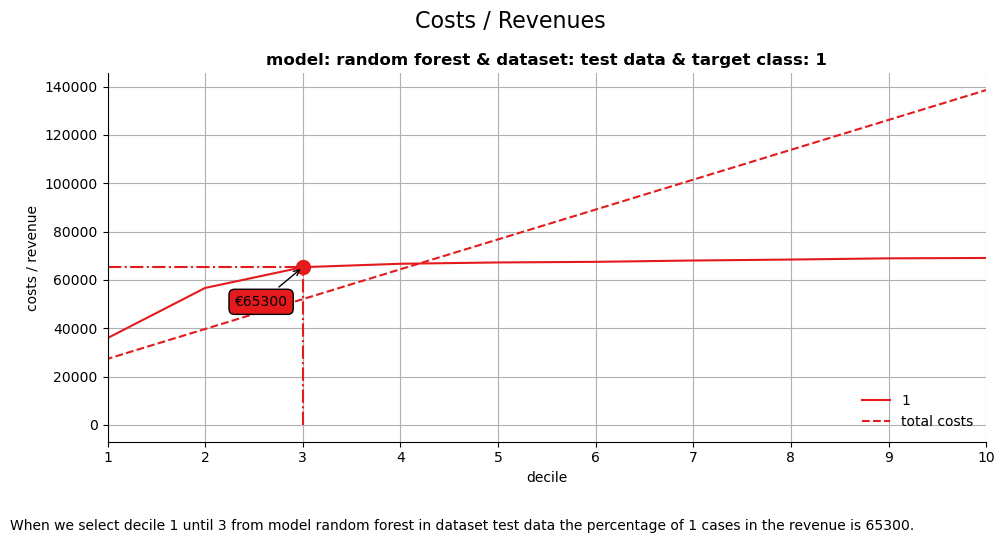

<Axes: title={'center': 'model: random forest & dataset: test data & target class: 1'}, xlabel='decile', ylabel='costs / revenue'>

In [75]:
mp.plot_costsrevs(
	ps3,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True, highlight_ntile=3,
)

Revenues 1..decile 3 | model=random forest | dataset=test data | target=1 | value=€65,300 — pos/tot=1,306 / 3,708
Revenues 1..decile 4 | model=random forest | dataset=test data | target=1 | value=€66,850 — pos/tot=1,337 / 4,943


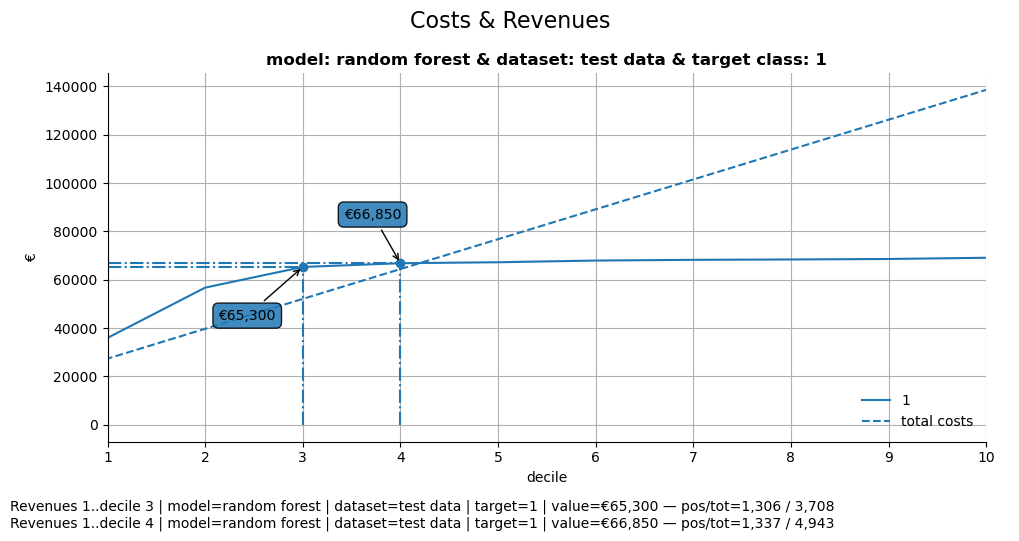

<Axes: title={'center': 'model: random forest & dataset: test data & target class: 1'}, xlabel='decile', ylabel='€'>

In [76]:
mp2.plot_costsrevs(
	ps4,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True, highlight_ntile=[3, 4],
)

In [77]:
# from IPython.core.display import display,HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
# np.set_printoptions(linewidth=110)